# in-out optimizing

In [1]:
import binance_helpers as bh
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import model as m
import ui
import importlib
import time
from datetime import datetime, timedelta
client = bh.new_binance_client()
importlib.reload(m)

<module 'model' from '/Users/SunnyNie/Documents/Investing/metagame/model.py'>

In [4]:
b = pd.read_csv("data/before.csv", index_col=0, parse_dates=True)
a = pd.read_csv("data/after.csv", index_col=0, parse_dates=True)
trades = pd.read_csv("data/tradesr.csv", index_col=0, parse_dates=True)
trades = trades.iloc[-5000:]

In [193]:
def analyze(trades, b, func):
    result = []
    for _ in range(len(func)):
        result.append([])
    i = 0
    length = len(trades)
    for i in range(length):
        s = trades.iloc[i].name
        e = s+timedelta(hours=1, minutes=59)

        for j in range(len(func)):
            try:
                result[j].append(func[j](b.loc[s:e]))
            except:
                print(f"Warning: failed for function #{j} for trades.iloc[{i}]")
                result[j].append(0)

        i += 1
        ui.printProgressBar(i, length)
    return result

In [194]:
len(trades[trades.pret>10].pret)

0

In [282]:
def returns(t):
    # return -(t.close[-60]-t.close[0])/t.close[0]
    below = 0.95
    above = 1.02
    tp = t.close[0]*below
    sl = t.close[0]*above
    slt = t[t.high>sl].index
    tpt = t[t.low<tp].index
    if len(slt) == 0 and len(tpt) == 0:
        return -(t.close[-1]-t.close[0])/t.close[0] - 0.003
    elif len(slt) == 0:
        return 1-below - 0.003
    elif len(tpt) == 0:
        return 1-above - 0.003
    else:
        if slt[0]>tpt[0]:
            return 1-below - 0.003
        else:
            return 1-above - 0.003
    
    

In [283]:
gains = analyze(trades, a, [returns])

 |██████████████████████████████████████████████████| 100.0% 


<AxesSubplot:>

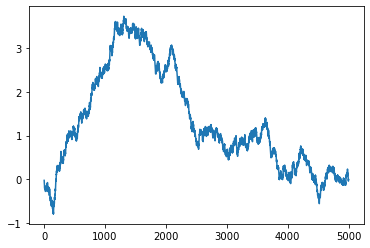

In [284]:
pd.Series(gains[0]).cumsum().plot()

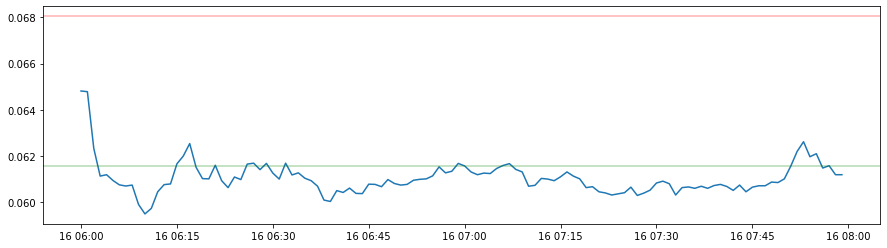

In [245]:
# i=102
d = a.loc[trades.iloc[i].name :trades.iloc[i].name+timedelta(hours=1, minutes=59)]
fig, ax = plt.subplots(figsize=(15,4))
ax.plot(d.index, d.close)
ax.axhline(d.close[0]*1.05, c="red", alpha=0.3)
ax.axhline(d.close[0]*0.95, c="green", alpha=0.3)
i += 1